#### Loading data & Exploratory analysis

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Data/breast-cancer.csv')

# Display the first few rows
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

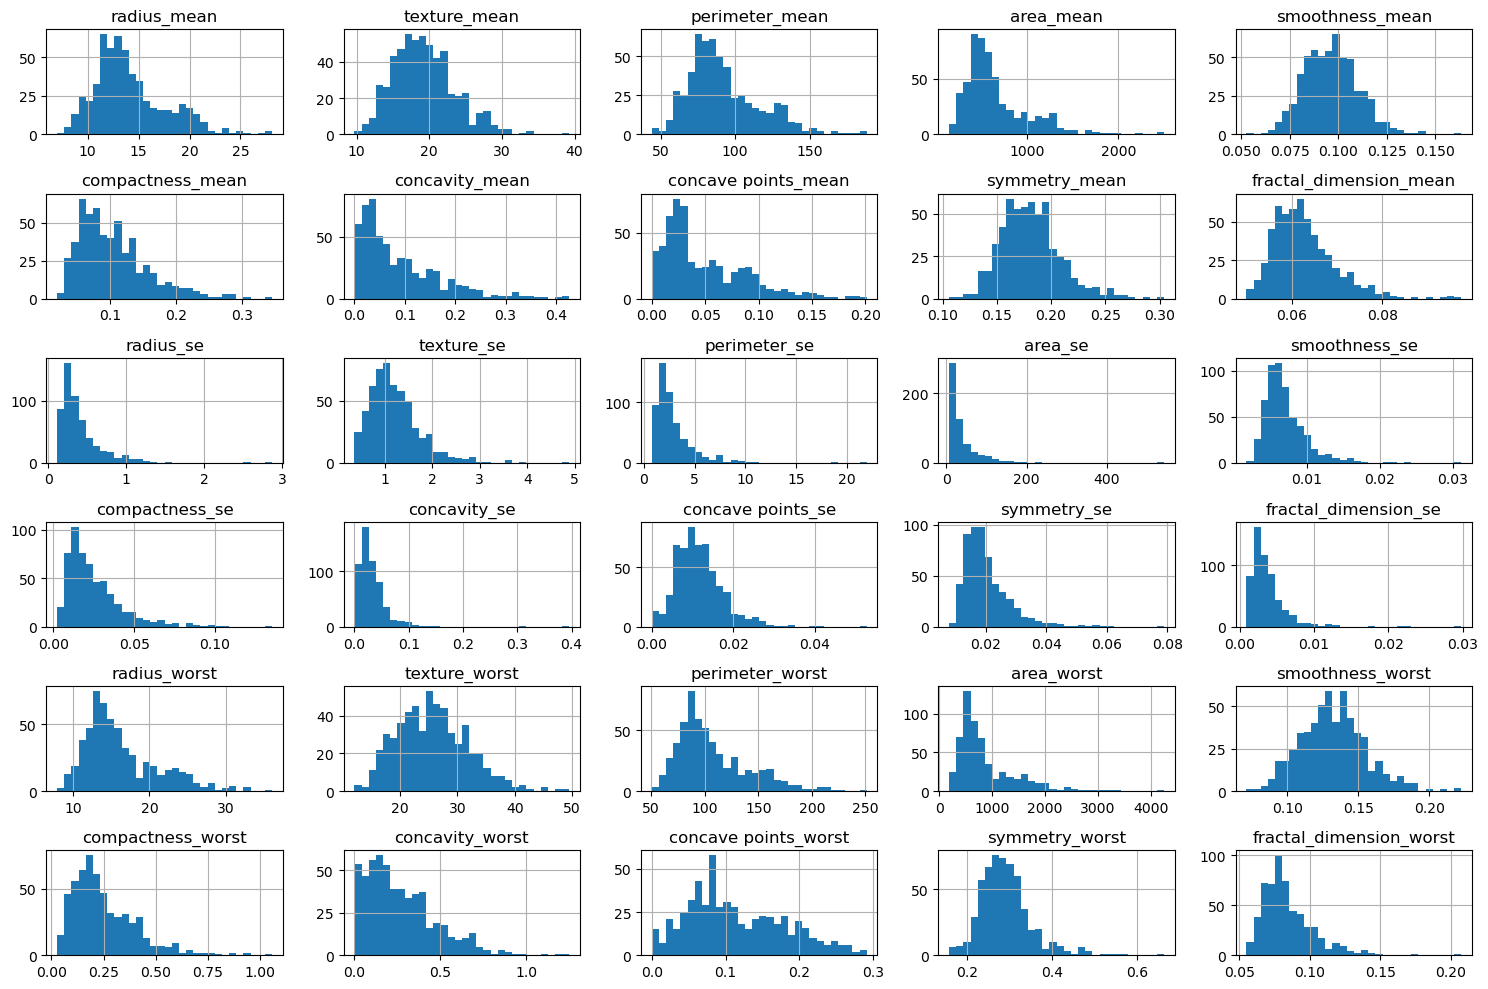

B    357
M    212
Name: diagnosis, dtype: int64


In [2]:
# Display summary statistics
print(df.describe())

# Visualize the distribution of features
import matplotlib.pyplot as plt

df.drop(['id'], axis=1).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Check class balance
class_counts = df['diagnosis'].value_counts()
print(class_counts)

#### Preprocess data

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encode the diagnosis column (Malignant = 1, Benign = 0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Split the data into features (X) and target variable (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Modeling

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize the classifiers with different parameters
classifiers = [
    DecisionTreeClassifier(max_depth=1),
    GaussianNB()
]

# Train and evaluate the classifiers
for classifier in classifiers:
    scores = cross_val_score(classifier, X_scaled, y, cv=5)
    print(f'{classifier.__class__.__name__}: {scores.mean()}')


DecisionTreeClassifier: 0.8998447446048751
GaussianNB: 0.927930445582984


#### Evaluating

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
for classifier in classifiers:
    y_pred = cross_val_predict(classifier, X_scaled, y, cv=5)
    print(f'{classifier.__class__.__name__} metrics:')
    print(f'Accuracy: {accuracy_score(y, y_pred)}')
    print(f'Precision: {precision_score(y, y_pred)}')
    print(f'Recall: {recall_score(y, y_pred)}')
    print(f'F1-Score: {f1_score(y, y_pred)}')


DecisionTreeClassifier metrics:
Accuracy: 0.9033391915641477
Precision: 0.9109947643979057
Recall: 0.8207547169811321
F1-Score: 0.8635235732009927
GaussianNB metrics:
Accuracy: 0.9279437609841827
Precision: 0.9090909090909091
Recall: 0.8962264150943396
F1-Score: 0.9026128266033254


#### Explanation

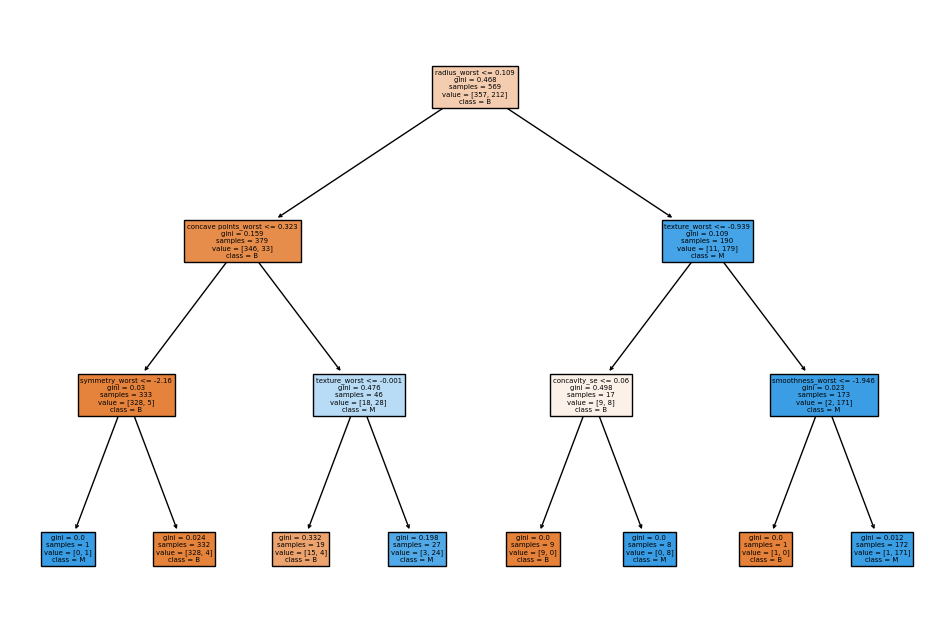

In [6]:
from sklearn.tree import plot_tree

# Create and fit a decision tree with max_depth=3
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_scaled, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


nodes near the root play a significant role in making decisions.
in decision tree each node evaluates a specific feature and compares it against a threshold. If the feature value satisfies the condition, the algorithm follows the left branch. Otherwise, it follows the right branch. The process continues until reaching a leaf node, where the final prediction (Malignant or Benign) is made.
